# Visualize the Attention of the Models

In [2]:
path = "/nfs/home/sveng/logs/tmp/opt_a-informer_l-sharpe_ty-2015_bs-128_lr-0.01_pa-25_gn-0.5_wl-63_ws-63_nl-1_dh-10_dr-0.1_dm-20_nh-4.p"

In [1]:
import numpy as np
import pandas as pd
import pickle
import torch
from torch.utils.data import DataLoader
from libs.data_loader import BaseDataLoader, DataTypes
import matplotlib.pyplot as plt
import seaborn as sns

from libs.data_loader import BaseDataLoader, DataTypes
from libs.futures_dataset import FuturesDataset

## Load Model & Data

In [3]:
train_dict = pickle.load(open(path, 'rb'))
model = train_dict['model']
train_manager = train_dict['train_manager']

# --- ---

index_col = 0

base_loader = BaseDataLoader(
    filename=train_manager['args']['filename'], index_col=index_col, start_date=train_manager['args']['start_date'], end_date=train_manager['args']['end_date'], test_date=train_manager['args']['test_date'], lead_target=train_manager['args']['lead_target'])

dataset_test = FuturesDataset(
    base_loader, DataTypes.TEST, win_size=train_manager['args']['win_len'], tau=train_manager['args']['lead_target'], step=train_manager['args']['step'], scaler=train_manager['args']['scaler'])
test_dataloader = DataLoader(
    dataset_test, batch_size=train_manager['args']['batch_size'], shuffle=False)

> Load raw datset (futures_prop.csv)
> Filtered out series: 
> Winzorizing [3, 3, 3, 1, 1] values at:             [ZR_close, NR_close, ZO_close, ZP_close, BN_close] (threshold: 5)
> Calculate covariates
> No additional scaling used


## Plot Predictions

LossTypes.SHARPE


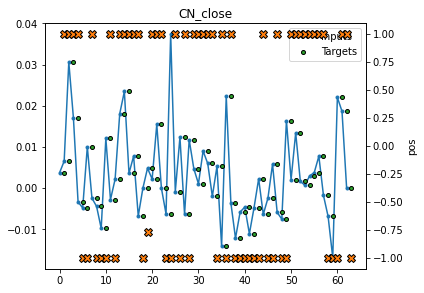

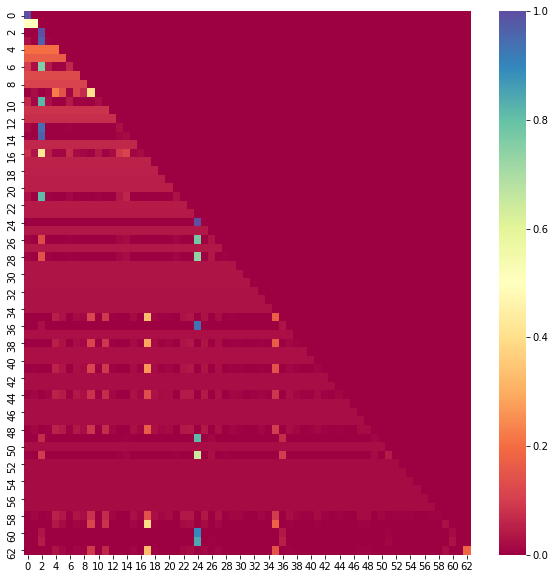

In [4]:
attn_i = dataset_test.plot_example(90, model=model, loss_type=train_manager['loss_type'])